[View in Colaboratory](https://colab.research.google.com/github/thiagomarquesrocha/titanic_survival_exploration/blob/master/Data_Science_for_Beginners_Hand_on.ipynb)

# Data Science for Beginners - Campus Party Rondônia - CPRO

Modelo de Previsão dos sobreviventes do Titanic

https://goo.gl/sJtzCs

## Sobreviventes do Titanic 

Em 1912, o navio RMS Titanic atingiu um iceberg em sua viagem inaugural e afundou, resultando na morte da maioria de seus passageiros e tripulantes. Neste projeto exploraremos um subconjunto do manifesto de passageiros do RMS Titanic para determinar quais recursos melhor descrevem se alguém sobreviveu ou não sobreviveu na tragédia. Para concluir este projeto, você precisará implementar previsões e explorar a base de dados a respeito das características mais importantes para prever se um passageiro sobreviveu ou não

https://youtu.be/9xoqXVjBEF8

## Primeiros passos

Para começar a trabalhar com a base do **Titanic**, precisamos importar todas as bibliotecas e recursos necessários para o projeto.

> **Dica**: Você pode executar uma linha de código usando as teclas **Shift + Enter**

A base está disponível em https://raw.githubusercontent.com/thiagomarquesrocha/titanic_survival_exploration/master/titanic_data.csv

In [0]:
# Importar todas as libs necessárias

# Análise de dados
import pandas as pd # processamento dos dados
import numpy as np # lib para operacoes matematica

# Visualização
import seaborn as sns # visualizar os dados
import matplotlib.pyplot as plt # visualização dos dados

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Melhorar a visualização para notebooks
%matplotlib inline

#### Carregar dataset

In [2]:
# Carregar o dataset usando o pandas e ler como dataframe (df)
df = pd.read_csv('https://raw.githubusercontent.com/thiagomarquesrocha/titanic_survival_exploration/master/titanic_data.csv')

# Visualizar as 10 primeiras linhas do dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Quais são as características disponível no dataset?**

Recortada uma amostra, nós conseguimos ver várias **características** presente para cada passageiro a bordo:

- **Survived**: Rótulo de sobrevivência (0 = Não; 1 = Sim)
- **Pclass**: Classe Socio-economica (1 = Classe A; 2 = Classe B; 3 = Class C)
- **Name**: Nome do passageiro
- **Sex**: Sexo do passageiro
- **Age**: Idade do passageiro (Algumas entradas podem ser NaN)
- **SibSp**: Número de irmãos e cônjuges do passageiro a bordo
- **Parch**: Número de pais e filhos do passageiro a bordo
- **Ticket**: Número do Ticket do passageiro
- **Fare**: Tarifa paga pelo passageiro
- **Cabin**: Número da cabine do passageiro (Algumas entradas podem ser NaN)
- **Embarked**: Porto de embarque do passageiro (C = Cherbourg; Q = Queenstown; S = Southampton)

Como estamos interessados no resultado da **sobrevivência** de cada passageiro ou membro da tripulação, podemos remover o recurso **Survived** desse conjunto de dados e armazená-lo como seus próprios resultados variáveis separados. Usaremos esses resultados como nossos alvos de previsão.

In [3]:
# Salvar o 'Survived' coluna em uma nova variável e remover do dataset
target = df['Survived']
data = df.drop('Survived', axis = 1)
# Visualizar as 10 primeiras linhas do dataset
data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


A mesma amostra dos dados do Titanic agora mostra o recurso **Sobrevivido** removido do DataFrame. Observe que os dados (dados do passageiro) e os resultados (resultados da sobrevivência) estão agora emparelhados. Isso significa que para qualquer passageiro *data.loc[i]*, eles têm os resultados dos resultados de sobrevivência *target[i]*.

## Análise dos dados

O pandas também ajuda a descrever os conjuntos de dados que respondem às perguntas no início do nosso projeto.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


#### Quais colunas são categóricas?

Esses valores classificam as amostras em conjuntos de amostras semelhantes. Dentro das características categóricas, os valores são nominais, ordinais, razão ou baseados em intervalos? Entre outras coisas, isso nos ajuda a selecionar os gráficos apropriados para visualização.

- **Categórico**: Sex, e Embarked. 
- **Ordinal**: Pclass.

In [5]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Miss. Constance Gladys",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


#### Quais colunas são numéricas?

Esses valores mudam de amostra para amostra. Dentro das características numéricas, os valores são discretos, contínuos ou baseados em timeseries? Entre outras coisas, isso nos ajuda a selecionar os gráficos apropriados para visualização.

- **Continuo**: PassengerId, Age, Fare. 
- **Discreto**: SibSp, Parch.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Quais colunas são tipos misturados?

Dados alfanuméricos numéricos dentro da mesma característica.

- **Ticket** é a mistura de números e alfanumérico tipos. 
- **Cabin** é alfanumérico.

#### Quais colunas podem conter erros ou erros de digitação?

O recurso de nome pode conter erros ou erros de digitação, pois há várias maneiras de descrever um nome, incluindo títulos, parênteses e citações usadas para nomes alternativos ou abreviados.

In [5]:
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Quais colunas podem conter valores vazios ou nulos?

É muito comum existir colunas no dataset que não tenham valores, nesses casos é muito importante identificar-las para saber o que fazer com ausência destas informações.

In [7]:
data.apply(lambda x : x.isnull()).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Explorar sobre os passageiros

In [6]:
# Copiar dataframe para processar
visualization = df.copy()

# Reescrever a classe de sobrevivencia para ficar mais facil de entender
visualization['Survived'] = visualization['Survived'].apply(lambda x : 'Survived' if x == 1 else "Did not Survived")

# Total de passageiros
len(visualization)

891

### Estatística de sobrevivência por sexo

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


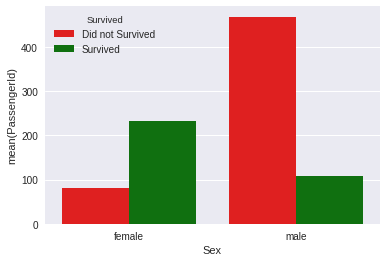

In [9]:
# Recuperar com tabelas pivores a estática de quantos sobreviveram
stats = pd.pivot_table(visualization, index=["Sex", "Survived"], values=['PassengerId'], aggfunc='count', margins=False)
# Resetar o index do resultado para permitir a visualização em gráfico de barras 
stats = stats.reset_index(level=['Sex', 'Survived'])
# Plota no gráfico de barras quantos sobrevireram e quantos não, categorizado por sexo
g = sns.barplot(x='Sex', y='PassengerId', hue="Survived", data=stats, palette=['r', 'g'])

Claramente a proporção de **homens** que não sobreviveram foi maior em relação as mulheres.

### Distribuição de sobreviência por classe socio-econômica

In [12]:
#sns.__version__
sns.catplot(x="Pclass", y="Age", hue="Survived",  data=visualization, palette=['r', 'g'])

AttributeError: ignored

A **terceira classe (3)** que estava localizado na parte inferior do navio concentrou o maior número de mortos.

### Distribuição de sobrevivência por idade 

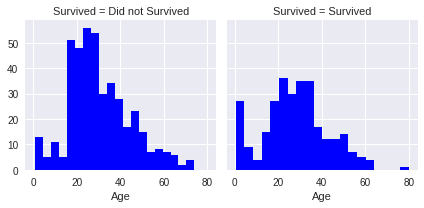

In [12]:
g = sns.FacetGrid(visualization, col='Survived')
g.map(plt.hist, 'Age', bins=20, color='b')

#### Observações:
-  Bebês (idade <= 4) tiveram alta taxa de sobrevivência.
- Os passageiros mais velhos (idade = 80) sobreviveram.
- Grande número de jovens de 15 a 25 anos não sobreviveu.
- A maioria dos passageiros está na faixa etária de 15 a 35 anos.

## Preprocessamento e engenharia de atributos

In [0]:
data.keys()

### Removendo atributos irrelevantes

Este é um bom objetivo inicial para executar. Ao descartar recursos, estamos lidando com menos pontos de dados, acelerando nosso notebook e facilitando a análise. Muitos recursos como Nome, pode não agregar muito valor sobre se um passageiro irá sobreviver ou não. Porque praticamente identifica um passageiro, e nosso objetivo é construir um modelo que generaliza.

Com base em nossas suposições e decisões, queremos descartar os recursos **Cabin**, **Ticket**, **PassengerId**, **Fare**, **Name**.

In [13]:
data.drop(['Cabin', 'Ticket', 'PassengerId', 'Name', 'Fare'], axis=1, inplace=True)
print('Atributos removidos')

Atributos removidos


In [0]:
data.keys()

### Criando novos atributos

Queremos analisar se o recurso Name pode ser projetado para extrair títulos e testar a correlação entre títulos e sobrevivência, antes de descartar os recursos Name e PassengerId.

No código a seguir, extraímos o recurso **Title** usando expressões regulares. O padrão RegEx (\ w + \.) Corresponde à primeira palavra que termina com um caractere de ponto no recurso **Name**. O sinalizador **expand = False** retorna um DataFrame.

In [14]:
# Extrair o tratamento dos passeiros do campo nome
data['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Usar cross table para cruzar as informações de Title X Sex
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,male,22.0,1,0,S,Mr
1,1,female,38.0,1,0,C,Mrs
2,3,female,26.0,0,0,S,Miss
3,1,female,35.0,1,0,S,Mrs
4,3,male,35.0,0,0,S,Mr
5,3,male,NaN,0,0,Q,Mr
6,1,male,54.0,0,0,S,Mr
7,3,male,2.0,3,1,S,Master
8,3,female,27.0,0,2,S,Mrs
9,2,female,14.0,1,0,C,Mrs


Podemos substituir muitos títulos por um nome mais comum ou classificá-los como *Raros*

In [16]:
# Diminuir a variação do tratamento e ficar com os mais comuns
data['Title'].replace('^(Lady|Countess|Capt|Col|Don|Dr|Major|Rev|Sir|Jonkheer|Dona)', 'Rare', regex=True, inplace=True)

data['Title'].replace('Mlle', 'Miss', inplace=True)
data['Title'].replace('Ms', 'Miss', inplace=True)
data['Title'].replace('Mme', 'Mrs', inplace=True)

# Combinar data e target para visualizar a nova feature title
combine = pd.concat([data, target], axis=1)

# Agrupar os sobreviventes pelo Title agora
combine[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Preenchendo os valores nulos ou ausentes

Para os passageiros que a idade não foi informada, iremos preencher com o valor da moda da distribuição de idades. Ou seja, o valor de idade mais comum. Muita gente preenche com média, moda, mediana. São algumas técnicas para preencher valores nulos.

In [17]:
# Idade
data['Age'].fillna(data['Age'].mode()[0], inplace=True)
# Faca o mesmo para Embarque
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,male,22.0,1,0,S,Mr
1,1,female,38.0,1,0,C,Mrs
2,3,female,26.0,0,0,S,Miss
3,1,female,35.0,1,0,S,Mrs
4,3,male,35.0,0,0,S,Mr
5,3,male,24.0,0,0,Q,Mr
6,1,male,54.0,0,0,S,Mr
7,3,male,2.0,3,1,S,Master
8,3,female,27.0,0,2,S,Mrs
9,2,female,14.0,1,0,C,Mrs


#### Discretizar idade

Discretizar atributos pode ajudar a diminuir a variância e o classificador a aprender mais fácil. Esse processo consiste em dividir um valor contínuo em range de valores. No nosso caso, a Idade daria para categorizar em **bebe, criança, jovem, adulto e idoso** considerado o range de idades.

In [18]:
def discretizar_idade(row):
    # Construa if para rotular os passageiros pela idade
    if row <= 5:
        return 'Bebe'
    elif row > 5 and row < 15:
        return 'Criança'
    elif row >= 15 and row <= 25:
        return 'Jovem'
    elif row > 25 and row <= 60:
        return 'Adulto'
    else:
        return 'Idoso'

# Criar uma feature nova para discretizar a idade em type
data.loc[:, 'Type'] = data['Age'].apply(discretizar_idade)
data.drop('Age', axis=1, inplace=True)

data.head(10)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Type
0,3,male,1,0,S,Mr,Jovem
1,1,female,1,0,C,Mrs,Adulto
2,3,female,0,0,S,Miss,Adulto
3,1,female,1,0,S,Mrs,Adulto
4,3,male,0,0,S,Mr,Adulto
5,3,male,0,0,Q,Mr,Jovem
6,1,male,0,0,S,Mr,Adulto
7,3,male,3,1,S,Master,Bebe
8,3,female,0,2,S,Mrs,Adulto
9,2,female,1,0,C,Mrs,Criança


### Categorizando e binarizando atributos

A maioria dos métodos preferem a representação númerica dos atributos, principalmente se o atributo em uso possui poucos valores como **Sex**, neste caso da para representar como binário o campo. 

#### Categorizar type

In [19]:
data['Type'] = data['Type'].astype('category').cat.codes
print("Atributo 'Type' categorizado")

Atributo 'Type' categorizado


#### Categorizar título

In [20]:
data['Title'] = data['Title'].astype('category').cat.codes
print("Atributo 'Title' categorizado")

Atributo 'Title' categorizado


#### Binarizar sexo

In [21]:
data['Sex'] = data['Sex'].astype('category').cat.codes
print("Atributo 'Sex' binarizado")

Atributo 'Sex' binarizado


#### Categorizar embarked

In [22]:
data['Embarked'] = data['Embarked'].astype('category').cat.codes
print("Atributo 'Embarked' categorizado")

Atributo 'Embarked' categorizado


In [23]:
data.head(10)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Type
0,3,1,1,0,2,2,4
1,1,0,1,0,0,3,0
2,3,0,0,0,2,1,0
3,1,0,1,0,2,3,0
4,3,1,0,0,2,2,0
5,3,1,0,0,1,2,4
6,1,1,0,0,2,2,0
7,3,1,3,1,2,0,1
8,3,0,0,2,2,3,0
9,2,0,1,0,0,3,2


## Dividir em treino e teste

Dividir em treino e teste é uma parte importante para garantir que o seu modelo está generalizando. Os dados que forem testado não devem está presente no treino, caso contrário, seu modelo está aprendendo uma coisa e está sendo avaliado nos mesmos dados, o que na prática não faz sentido. O que desejamos é a generalização do método, testá-lo com novos dados que jamais foram vistos por ele a fim de avaliar sua capacidade de generalizar novas entradas a partir do treinamento.

### Data

In [24]:
data.head(5)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Type
0,3,1,1,0,2,2,4
1,1,0,1,0,0,3,0
2,3,0,0,0,2,1,0
3,1,0,1,0,2,3,0
4,3,1,0,0,2,2,0


### Target

In [25]:
target.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
# Dividiremos nosso dataset em 20% para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=2)
print("Treino: {}".format(len(X_train)))
print("Teste: {}".format(len(X_test)))

Treino: 712
Teste: 179


## Avaliação do modelo

Agora estamos prontos para treinar um modelo e prever a solução necessária. Existem mais de **60 algoritmos** de modelagem preditiva para escolher. Devemos entender o tipo de problema e o requisito de solução para restringir a alguns modelos selecionados que podemos avaliar. Nosso problema é de classificação e regressão. Queremos identificar a relação entre saída (Sobrevivida ou não) com outras variáveis ou características (Sexo, Idade, Porta ...). Também estamos realizando uma categoria de aprendizado de máquina que é chamada de aprendizado supervisionado, pois estamos treinando nosso modelo com um determinado conjunto de dados. 

Com esses dois critérios - Aprendizado Supervisionado mais Classificação e Regressão, podemos restringir nossa escolha de modelos a alguns. Esses incluem:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

http://scikit-learn.org/stable/supervised_learning.html

In [27]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.04

In [28]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

84.55

In [29]:
# K Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.25

In [30]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

80.2

In [31]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


65.03

In [32]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

80.34

In [37]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


73.88

In [33]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

88.2

In [34]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

88.2

### Melhor resultado

Podemos agora classificar nossa avaliação de todos os modelos para escolher o melhor para o nosso problema. Embora tanto a Árvore de Decisão quanto a Floresta Aleatória pontuem o mesmo, optamos por usar a Floresta Aleatória quando ela corrige o hábito de overfitting das árvores de decisão em seu conjunto de treinamento.

In [38]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.20
8,Decision Tree,88.20
1,KNN,85.25
0,Support Vector Machines,84.55
2,Logistic Regression,81.04
7,Linear SVC,80.34
4,Naive Bayes,80.20
6,Stochastic Gradient Decent,73.88
5,Perceptron,65.03


### Análise do melhor vs pior resultado

Avaliar o desempenho do melhor e o pior modelo visando comparar a classificação dos modelos em relação ao resultado da classificação por classe

#### Matrix de confusão

In [39]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

confusion_matrix(y_test, Y_pred)

array([[94,  6],
       [31, 48]])

In [40]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("Acc:", acc_gaussian)
print("AUCROC:", round(roc_auc_score(y_test, Y_pred) * 100))
confusion_matrix(y_test, Y_pred)

Acc: 80.2
AUCROC: 78.0


array([[86, 14],
       [23, 56]])

In [0]:
# Support Vector Machines
# Crie um modelo gerando as previsões
confusion_matrix(y_test, Y_pred)

### Atributos mais relevantes para Random Forest

Além de um classificador, árvores de decisão são bons mecanismos de seleção de atributos. Pois consideram no aprendizado o cálculo de entropia e ganho da informação para os atributos. O que nos permite listar os top atributos com maior ganho de informação nos dados.

In [0]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

### Melhorar o resultado

Existem iúmeras maneiras de otimizar e uma delas é ajustar a representação dos atributos de forma a ajudar o classificador a aprender certas informações mais rápido. Uma que vamos utilizar é a representação one-hot-encoder para evitar que certos atributos como **Title** ou **Embarked**, assim vamos evitar que o modelo compare em sentido de ordem. 

In [0]:
X_train.keys()

In [0]:
X_train = pd.get_dummies( X_train, columns = ['Title', 'Embarked'] )
X_test = pd.get_dummies( X_test, columns = ['Title', 'Embarked'] )

X_train.head(10)

### Comparar com outras métricas de avaliação

É muito comum utilizar apenas 1 tipo de métrica para o problema, o que pode levar a falsa conclusão de que o modelo é o melhor encontrado. Veja um exemplo utilizando a curva AUCROC

http://gim.unmc.edu/dxtests/roc3.htm

In [0]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Acc:", acc_random_forest)
print("AUCROC:", round(roc_auc_score(y_test, Y_pred) * 100))
confusion_matrix(y_test, Y_pred)

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("Acc:", acc_gaussian)
print("AUCROC:", round(roc_auc_score(y_test, Y_pred) * 100))
confusion_matrix(y_test, Y_pred)

## References

https://www.kaggle.com/startupsci/titanic-data-science-solutions

https://github.com/thiagomarquesrocha/titanic_survival_exploration/blob/master/titanic_survival_exploration.ipynb

https://paulovasconcellos.com.br/competicao-kaggle-titanic-tutorial-5b11993774f7

https://medium.com/marciojesus/investigando-o-naufr%C3%A1gio-do-titanic-b478c7750d31

http://felipegalvao.com.br/blog/2016/03/31/estatistica-descritiva-com-python/